# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ketut Arda Putra Mahotama Sadha
- **Email:** ardaputramahot@gmail.com
- **ID Dicoding:** arda294

## Menentukan Pertanyaan Bisnis

- Berapa pertumbuhan jumlah penjualan yang terjadi pada tahun 2017?
- Seperti apa segmentasi pelanggan berdasarkan RFM analysis?

## Import Semua Packages/Library yang Digunakan

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Data Wrangling

### Gathering Data

#### orders_dataset

In [143]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


#### order_payments_dataset

In [144]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


### Assessing Data

#### orders_df

In [145]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [146]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terlihat terdapat beberapa row dengan value dari kolom `order_delivered_carrier_date`, `order_approved_at`, dan `order_delivered_customer_date` yang memiliki value null.

Selain itu, kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` belum memiliki tipe data yang sesuai.

In [147]:
orders_df.duplicated().sum()

0

Tidak terdapat data terduplikat dalam dataframe ini.

#### order_payments_df

In [148]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [149]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [150]:
print("Jumlah order yang terduplikasi:", order_payments_df.duplicated().sum())
order_payments_df.describe(include='all')

Jumlah order yang terduplikasi: 0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Tidak terdapat data yang terduplikat pada dataframe ini. Kolom `payment_value` memiliki nilai max yang sangat jauh dibandingkan mean dan median, dapat dikatakan value tersebut adalah outlier. 

<Axes: xlabel='payment_value'>

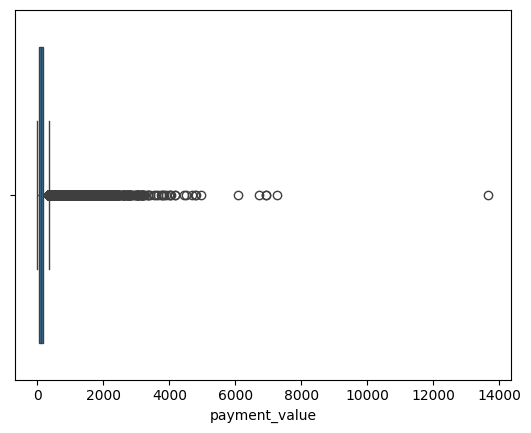

In [151]:
sns.boxplot(x=order_payments_df.payment_value)

Bisa dilihat dari boxplot diatas, terdapat outlier untuk kolom `payment_value`.

In [152]:
order_payments_df.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Terdapat order yang tidak memiliki tipe pembayaran.

#### Kesimpulan Assessing Data

##### orders_df
- Terlihat terdapat beberapa row dengan value dari kolom `order_delivered_carrier_date`, `order_approved_at`, dan `order_delivered_customer_date` yang memiliki value null.
- Selain itu, kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` belum memiliki tipe data yang sesuai.

##### order_payments_df
- Kolom `payment_value` memiliki nilai max yang sangat jauh dibandingkan mean dan median, dapat dikatakan value tersebut adalah outlier.
- Terdapat order yang tidak memiliki tipe pembayaran. 

### Cleaning Data

#### orders_df

In [153]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [154]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Berikut adalah jumlah untuk masing-masing kolom yang terdapat nilai `null` atau `NaN`.

In [155]:
orders_df = orders_df.dropna()
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Code diatas akan drop tiap baris yang memiliki kolom dengan nilai `null` atau `NaN`.

In [156]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Code diatas akan mengonversi tipe data `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` menjadi datetime. Dan diatas juga adalah hasil ahkir Data Cleaning.

#### order_payments_df

Q1: 56.79
Q3: 171.8375
IQR: 115.04750000000001
IQR Lower range: 0
IQR Upper range: 344.40875000000005


<Axes: xlabel='payment_value'>

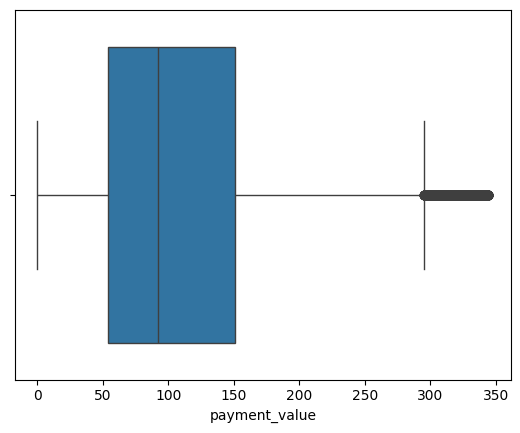

In [157]:
Q1 = order_payments_df.payment_value.quantile(.25)
Q3 = order_payments_df.payment_value.quantile(.75)
IQR = Q3 - Q1

lower_range = max(0, Q1 - IQR * 1.5)
upper_range = Q3 + IQR * 1.5

print("Q1:", Q1)
print("Q3:", Q3)

print("IQR:", IQR)

print("IQR Lower range:", lower_range)
print("IQR Upper range:", upper_range)

order_payments_df = order_payments_df[(order_payments_df.payment_value > lower_range) & (order_payments_df.payment_value < upper_range)]

sns.boxplot(x=order_payments_df.payment_value)

Code diatas akan menghapus outlier menggunakan metode IQR. Boxplot diatas masih menunjukkan outlier karena jumlah data pada dataframe sudah berubah dari aslinya dalam proses penghapusan outlier.

In [158]:
order_payments_df = order_payments_df[order_payments_df.payment_type != 'not_defined']

Code diatas akan menghapus setiap baris dimana `payment_type` adalah `not_defined`.

In [159]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,95896.000000,95896.000000,95896.000000
mean,1.099180,2.628473,110.072463
std,0.731992,2.451646,72.780658
min,1.000000,0.000000,0.010000
25%,1.000000,1.000000,54.000000
50%,1.000000,1.000000,92.200000
75%,1.000000,3.000000,150.590000
max,29.000000,24.000000,344.340000


Hasil ahkir `order_payments_df` setelah Data Cleaning.

## Exploratory Data Analysis (EDA)

### Explore pertumbuhan penjualan pada tahun 2017

In [160]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [161]:
orders_2017 = orders_df[orders_df['order_approved_at'].dt.year == 2017]

Code diatas akan memfilter menjadi hanya pada tahun 2017

In [162]:
orders_by_month_2017 = orders_2017['order_approved_at'].groupby(orders_2017['order_approved_at'].dt.month).count()
orders_by_month_2017

order_approved_at
1      715
2     1638
3     2554
4     2278
5     3547
6     3143
7     3828
8     4217
9     4169
10    4441
11    7149
12    5675
Name: order_approved_at, dtype: int64

Code diatas menghitung jumlah penjualan per bulan

Growth: 693.71%


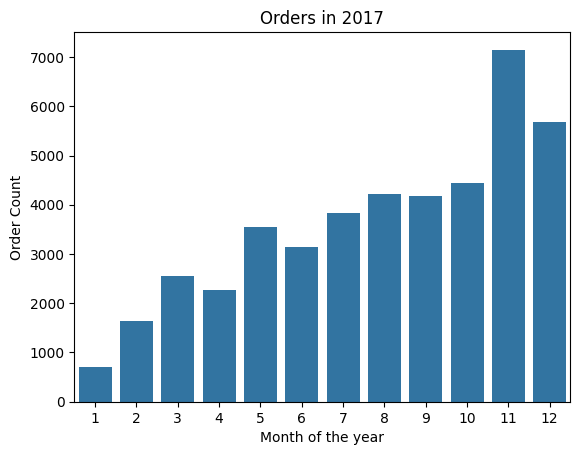

In [163]:
sns.barplot(orders_by_month_2017)
plt.xlabel('Month of the year')
plt.ylabel('Order Count')
plt.title('Orders in 2017')
percent_growth = ((orders_by_month_2017[12] - orders_by_month_2017[1]) / orders_by_month_2017[1]) * 100
print('Growth: {:.2f}%'.format(percent_growth))
orders_df.to_csv('dashboard/orders.csv')
# orders_by_month_2017.to_csv('dashboard/orders_by_month_2017.csv')

Berdasarkan perhitungan diatas, terdapat pertumbuhan 693.71% dari awal tahun hingga ahkir tahun.

### Explore segmentasi pelanggan berdasarkan RFM analysis

In [164]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95896 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              95896 non-null  object 
 1   payment_sequential    95896 non-null  int64  
 2   payment_type          95896 non-null  object 
 3   payment_installments  95896 non-null  int64  
 4   payment_value         95896 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.4+ MB


In [165]:
order_with_payments = order_payments_df.merge(orders_df, how='inner', on='order_id')
order_with_payments.info()

now = order_with_payments.order_approved_at.max()
now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93102 entries, 0 to 93101
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93102 non-null  object        
 1   payment_sequential             93102 non-null  int64         
 2   payment_type                   93102 non-null  object        
 3   payment_installments           93102 non-null  int64         
 4   payment_value                  93102 non-null  float64       
 5   customer_id                    93102 non-null  object        
 6   order_status                   93102 non-null  object        
 7   order_purchase_timestamp       93102 non-null  datetime64[ns]
 8   order_approved_at              93102 non-null  datetime64[ns]
 9   order_delivered_carrier_date   93102 non-null  datetime64[ns]
 10  order_delivered_customer_date  93102 non-null  datetime64[ns]
 11  order_estimated

Timestamp('2018-08-29 15:10:26')

Tanggal terbaru pada dataset yaitu 2018-08-29 dan ini akan dijadikan patokan untuk Recency pada RFM analysis.

In [166]:
customer_rfm = order_with_payments.groupby('customer_id').agg(
    recency=("order_approved_at", lambda x: (now - x.max()).days),
    frequency=("customer_id", "count"),
    monetary=("payment_value", "sum")
).reset_index(col_level=1)

customer_rfm.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74
1,000161a058600d5901f007fab4c27140,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,377,1,179.35
4,000379cdec625522490c315e70c7a9fb,147,1,107.01


Code diatas akan melakukan agregasi data untuk mencari nilai recency, frequency, dan monetary setiap customer.

Pelanggan 1 Pembelian: 96.91%


<Axes: xlabel='frequency', ylabel='Count'>

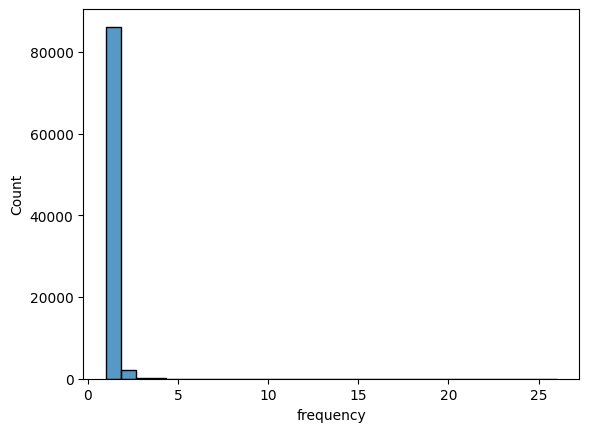

In [167]:
print("Pelanggan 1 Pembelian: {:.2f}%".format((customer_rfm['frequency'].value_counts().iloc[0] / customer_rfm['frequency'].size) * 100))
sns.histplot(customer_rfm['frequency'], bins=30)

Berdasarkan grafik diatas, data sangatlah right-skewed dimana jumlah pelanggan yang hanya membeli sekali sangatlah banyak yang menyusun 96.91% dari seluruh penjualan

<Axes: xlabel='frequency', ylabel='Count'>

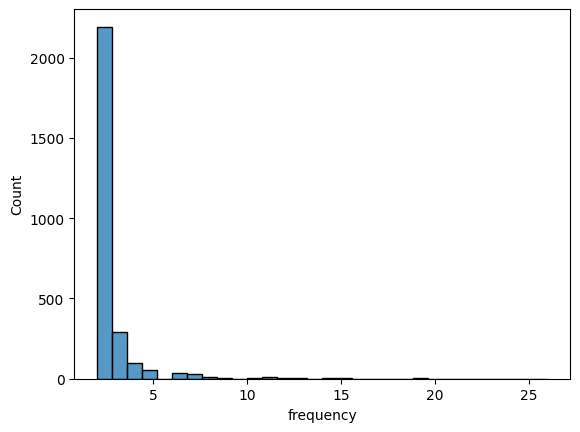

In [168]:
unfiltered_customer_rfm = pd.DataFrame(customer_rfm)
customer_rfm = customer_rfm[customer_rfm['frequency'] > 1]
sns.histplot(customer_rfm['frequency'], bins=30)

Histogram frequency setelah drop pelanggan yang hanya membeli sekali.

<Axes: xlabel='recency', ylabel='Count'>

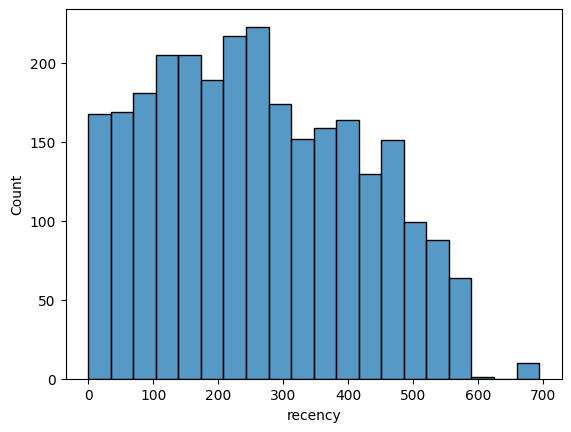

In [169]:
sns.histplot(customer_rfm.recency, bins=20)

Histogram recency setelah drop pelanggan yang hanya belanja sekali.

<Axes: xlabel='monetary', ylabel='Count'>

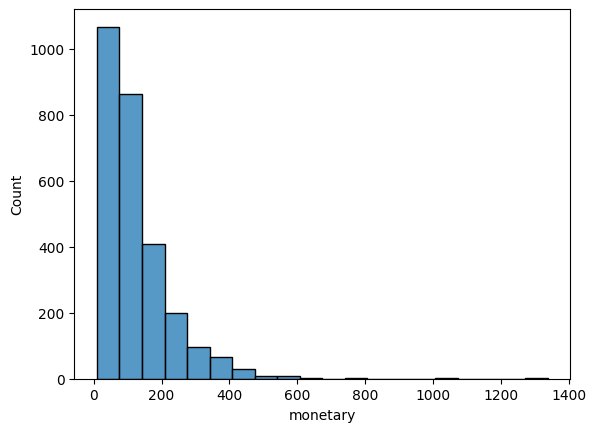

In [170]:
sns.histplot(customer_rfm.monetary, bins=20)

Histogram monetary setelah drop pelanggan yang hanya belanja sekali.

In [171]:
customer_rfm['r_score'] = pd.qcut(customer_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
customer_rfm['f_score'] = pd.qcut(customer_rfm['frequency'], [.5, .8, .92, .95, .98, 1], labels=[1, 2, 3, 4, 5])
customer_rfm['m_score'] = pd.qcut(customer_rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

customer_rfm['rfm_segment'] = customer_rfm['r_score'].astype(str) + customer_rfm['f_score'].astype(str) + customer_rfm['m_score'].astype(str)
customer_rfm.head(10)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_segment
15,000e943451fc2788ca6ac98a682f2f49,494,4,106.23,1,2,3,123
21,001051abfcfdbed9f87b4266213a5df1,91,3,65.20,5,1,2,512
97,004937d0f9d6ce15c2830c00c2f482e5,213,2,70.91,3,1,2,312
144,006a5d6b5f648f3811fd4fa94d93a67c,456,2,76.94,1,1,2,112
169,007b18ac9b8a627f259ea78aed981315,164,2,43.13,4,1,1,411
176,007e99fec9d53dfa4e5d8be9c2b36ca7,452,7,410.37,1,4,5,145
179,00838729460c2110a0bd330a4bb9b332,158,2,55.13,4,1,2,412
190,008def95c3ec7f58d2cc8f2b1d2c3feb,371,2,51.14,2,1,1,211
206,0097c5abeb126a90646370f4a1cf3d93,85,3,148.68,5,1,4,514
228,00a7f9b60493b4b11601b42e5f31eac9,86,2,58.35,5,1,2,512


Code diatas membagikan skor RFM dilihat dari persentil data.

In [172]:
def label_rfm(row):
    if re.match(r'[12][12]', row['rfm_segment']):
        return 'Hibernating'
    elif re.match(r'[12][34]', row['rfm_segment']):
        return 'At risk'
    elif re.match(r'[12][5]', row['rfm_segment']):
        return 'Can\'t lose them'
    elif re.match(r'[3][12]', row['rfm_segment']):
        return 'About to sleep'
    # elif re.match(r'[3][3]', row['rfm_segment']):
    #     return 'Need attention'
    elif re.match(r'[34][45]', row['rfm_segment']):
        return 'Loyal customers'
    elif re.match(r'[4][1]', row['rfm_segment']):
        return 'Promising'
    elif re.match(r'[5][1]', row['rfm_segment']):
        return 'New customers'
    elif re.match(r'[345][23]', row['rfm_segment']):
        return 'Potential loyalists'
    elif re.match(r'[5][45]', row['rfm_segment']):
        return 'Champions'
    return 'Hibernating'

customer_rfm['segment_result'] = customer_rfm.apply(label_rfm, axis=1)
customer_rfm.head()


,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_segment,segment_result
15,000e943451fc2788ca6ac98a682f2f49,494,4,106.23,1,2,3,123,Hibernating
21,001051abfcfdbed9f87b4266213a5df1,91,3,65.20,5,1,2,512,New customers
97,004937d0f9d6ce15c2830c00c2f482e5,213,2,70.91,3,1,2,312,About to sleep
144,006a5d6b5f648f3811fd4fa94d93a67c,456,2,76.94,1,1,2,112,Hibernating
169,007b18ac9b8a627f259ea78aed981315,164,2,43.13,4,1,1,411,Promising


Code diatas akan memberikan label menggunakan regex untuk mencocokan skor recency dan frequency.

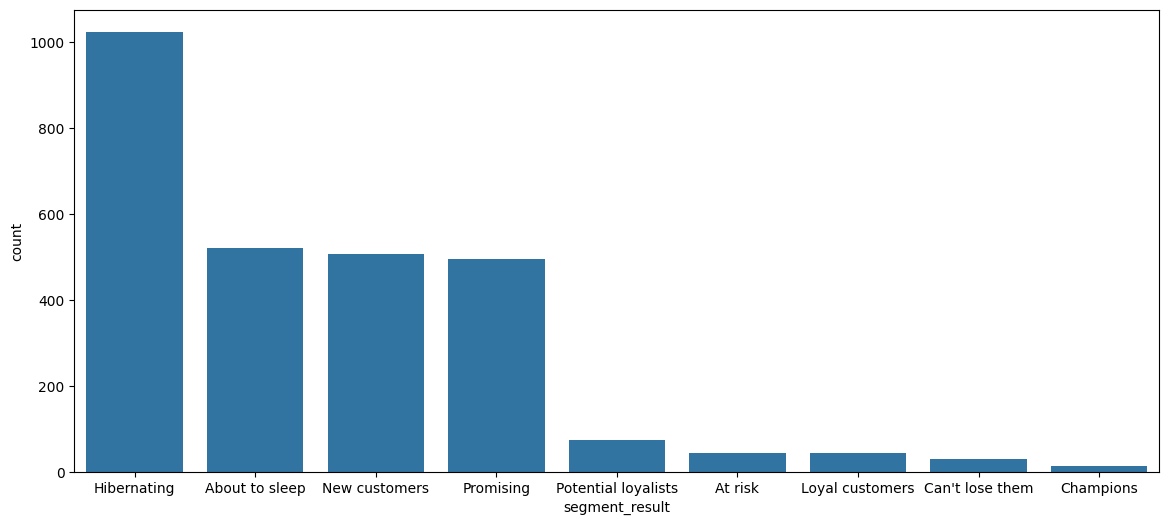

In [173]:
plt.figure(figsize=(14, 6))
sns.barplot(customer_rfm['segment_result'].value_counts())
customer_rfm.to_csv('dashboard/customer_rfm.csv')
order_with_payments.to_csv('dashboard/orders_with_payments.csv')

Hasil ahkir segmentasi pelanggan pada E-Commerce ini.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa pertumbuhan jumlah penjualan yang terjadi pada tahun 2017?

C:\Users\ardap\AppData\Local\Temp\ipykernel_28728\2892239015.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(orders_by_month_2017, palette=sns.color_palette("husl", 2))
C:\Users\ardap\AppData\Local\Temp\ipykernel_28728\2892239015.py:1: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(orders_by_month_2017, palette=sns.color_palette("husl", 2))


Growth: 693.71%


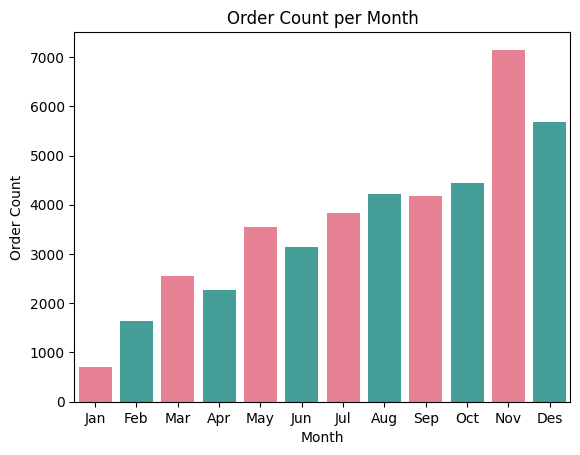

In [174]:
sns.barplot(orders_by_month_2017, palette=sns.color_palette("husl", 2))
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.title('Order Count per Month')
plt.xticks(orders_by_month_2017.index - 1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'])
percent_growth = ((orders_by_month_2017[12] - orders_by_month_2017[1]) / orders_by_month_2017[1]) * 100
print('Growth: {:.2f}%'.format(percent_growth))

Dapat dilihat berdasarkan barplot diatas, terdapat pertumbuhan signifikan yaitu 693.71% yang terjadi terhadap total penjualan dari awal hingga ahkir tahun 2017

### Pertanyaan 2: Seperti apa segmentasi pelanggan berdasarkan RFM analysis?

In [175]:
first_time_buyer = unfiltered_customer_rfm[unfiltered_customer_rfm['frequency'] == 1]['frequency'].count()
total_customer = unfiltered_customer_rfm['frequency'].count()

print("First time buyers: {}".format(first_time_buyer))
print("Total buyers: {}".format(total_customer))
print("First time buyer percentage: {:.2f}%".format((first_time_buyer / total_customer) * 100))


First time buyers: 86212
Total buyers: 88961
First time buyer percentage: 96.91%


Pada E-Commerce ini, terdapat 96.91% pelanggan yang hanya pernah belanja sekali.

count    2749.000000
mean        2.506366
std         1.588159
min         2.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        26.000000
Name: frequency, dtype: float64

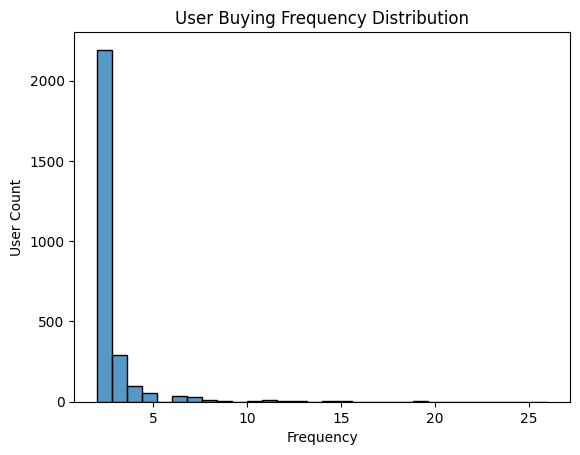

In [176]:
sns.histplot(customer_rfm.frequency, bins=30)
plt.xlabel('Frequency')
plt.ylabel('User Count')
plt.title('User Buying Frequency Distribution')
customer_rfm.frequency.describe()


Setelah pelanggan yang hanya belanja sekali difilter, dapat dilihat dari histogram diatas bahwa data masih sangat left-skewed. Sebagian besar pelanggan (yang belanja lebih dari sekali) dari E-Commerce ini hanya belanja 2 kali saja. Ini akan lebih jelas lagi ketika melihat grafik grafik berikutnya.

count    2749.000000
mean      262.353583
std       156.060130
min         0.000000
25%       133.000000
50%       252.000000
75%       385.000000
max       694.000000
Name: recency, dtype: float64

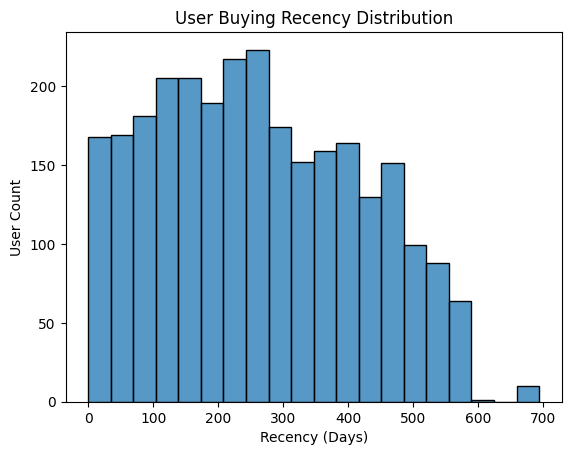

In [177]:
sns.histplot(customer_rfm.recency, bins=20)
plt.xlabel('Recency (Days)')
plt.ylabel('User Count')
plt.title('User Buying Recency Distribution')
customer_rfm.recency.describe()

Berdasarkan grafik diatas, pelanggan pada E-Commerce ini banyak terdapat pelanggan baru (Recency lebih rendah artinya pelanggan terahkir belanja tak lama lalu) dan juga pelanggan yang terahkir belanja sekitar 200-300 hari yang lalu atau 7-10 bulan yang lalu. Kalau dikaitkan dengan data frequency, sepertinya pelanggan E-Commerce ini memiliki retensi yang kurang.

count    2749.000000
mean      124.082754
std        99.288495
min         9.590000
25%        57.720000
50%        95.320000
75%       157.220000
max      1338.410000
Name: monetary, dtype: float64

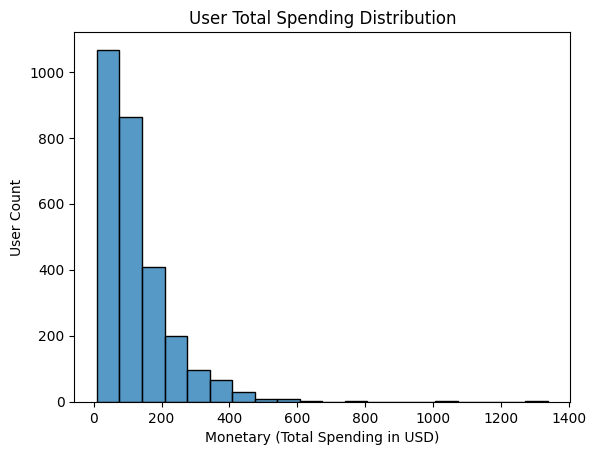

In [178]:
sns.histplot(customer_rfm.monetary, bins=20)
plt.xlabel('Monetary (Total Spending in USD)')
plt.ylabel('User Count')
plt.title('User Total Spending Distribution')
customer_rfm.monetary.describe()

Dari sisi Monetary yaitu total spending yang dilakukan pelanggan, grafik nya juga sangat right-skewed. Seperti yang dilihat dari Frequency dan Recency, ini ada hubungannya dengan jumlah pelanggan baru yang ada dan juga kemampuan retensi pelanggan E-Commerce ini.

C:\Users\ardap\AppData\Local\Temp\ipykernel_28728\4227760082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(customer_rfm['segment_result'].value_counts(), palette=sns.color_palette("husl", 8))
C:\Users\ardap\AppData\Local\Temp\ipykernel_28728\4227760082.py:2: UserWarning: 
The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(customer_rfm['segment_result'].value_counts(), palette=sns.color_palette("husl", 8))


segment_result
Hibernating            1025
About to sleep          521
New customers           506
Promising               495
Potential loyalists      73
At risk                  43
Loyal customers          43
Can't lose them          30
Champions                13
Name: count, dtype: int64

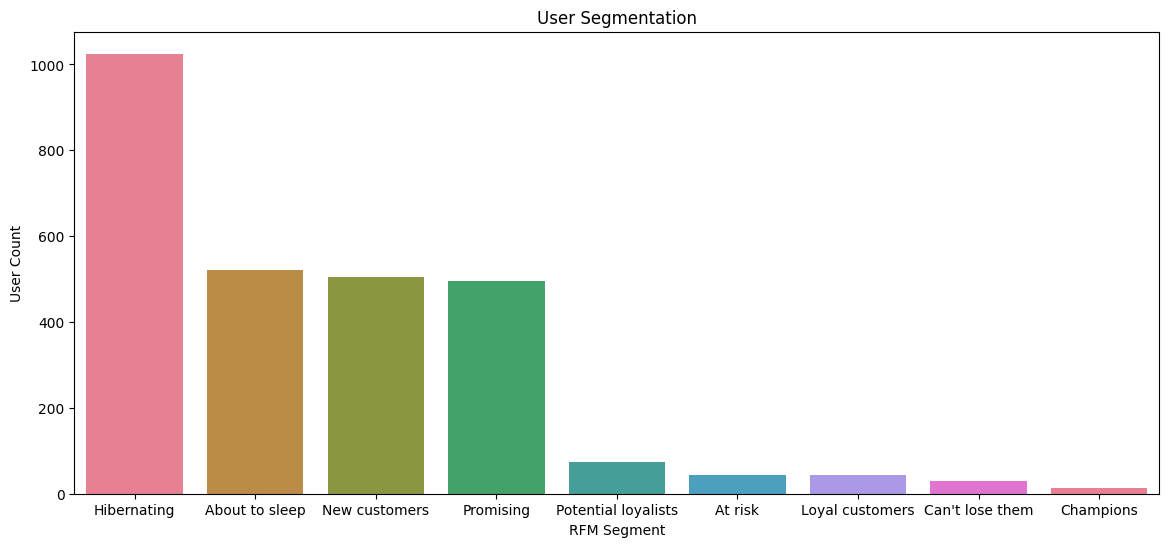

In [179]:
plt.figure(figsize=(14, 6))
sns.barplot(customer_rfm['segment_result'].value_counts(), palette=sns.color_palette("husl", 8))
plt.title('User Segmentation')
plt.ylabel('User Count')
plt.xlabel('RFM Segment')

customer_rfm.segment_result.value_counts()


Bisa dilihat berdasarkan grafik segmentasi diatas, sebagian besar user Hibernating yaitu user yang sudah lama tidak belanja dan hanya belanja sedikit. Disini juga banyak terdapat pelanggan yang About to sleep yang artinya mereka tak lama lalu pernah belanja tetapi hanya belanja sedikit. Bisa dilihat juga, terdapat banyak New Customer dan Juga Promising customer. Promising artinya user cukup dekat dengan hari ini belanja belanja dengan dengan jumlah yang rata-rata. Potential loyalist yaitu user yang cukup dekat dengan hari ini belanja dan frekuensi belanja diatas rata-rata dan Loyal customer yaitu user yang dekat dengan hari ini belanja dan frekuensi belanja diatas rata-rata, sedikit, memiliki jumlah kecil. At risk dan Can't lose them adalah pelanggan yang pernah loyal yang sudah lama tidak belanja dan kedua segmen ini memiliki jumlah kecil. Terahkir segment Champion yaitu pelanggan yang paling sering berbelanja dan terahkir kali belanja sangat dekat.

## Conclusion

- Conclusion pertanyaan 1

    Terdapat pertumbuhan total penjualan yang sangat signifikan yaitu sebesar 693.71% pada tahun 2017. Ini diduga karena banyaknya pelanggan baru yang belanja pada E-Commerce ini.

- Conclusion pertanyaan 2

    Segmentasi pelanggan berdasarkan RFM analysis dari pelanggan-pelanggan yang telah belanja lebih dari sekali yaitu, terdapat banyak pelanggan pada E-Commerce ini. Ini dapat menjelaskan tingkat pertumbuhan total penjualan yang terjadi. Selain itu, jumlah pelanggan loyal cukup kecil. Di sisi lain, terdapat banyak pelanggan yang lama tidak berbelanja dan juga sedikit berbelanja. Terlebih lagi, jumlah pelanggan yang hanya belanja sekali mencapai 96.91%. Ini dapat menjadi indikasi bahwa E-Commerce ini tidak memiliki retensi yang kuat terhadap pelanggan. 